In [1]:
import pandas as pd
import numpy as np

In [3]:
# File downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
# Although the file comes with headers, it's specified to get desired format
wine_data = pd.read_csv('data/winequality-white.csv',
                       names = [
                           "Fixed Acidity", "Volatile acidity", "Citric Acid", "Residual Sugar",
                           "Chlorides", "Free Sulphur Dioxides", "Total Sulphur Dioxide", "Density",
                           "pH", "Sulphates", "Alcohol", "Quality"
                       ],
                       skiprows=1,
                       sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulphur Dioxides,Total Sulphur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


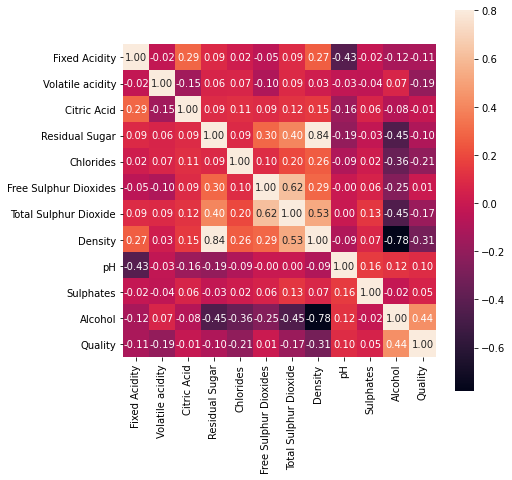

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [6]:
X = wine_data.drop('Quality', axis=1)
y = wine_data['Quality']

In [7]:
from sklearn.model_selection import train_test_split

# Splitting into 80% training and 20% testing set so as to check accuarcy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Declaring the model without any parameter
classifier = DecisionTreeClassifier(max_depth=5,  max_features=4, criterion='entropy')
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4)

In [43]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4)

In [44]:
score = classifier.score(X_test, y_test)
print(score)

# O/P: 0.5806122448979592
# The accuracy is quite good relative to 14%, which would be otherwise obtained
# as 7 different values for quality of wine are contained in the dataset

# New Accuracy O/P: 0.4928571428571429

0.49387755102040815


In [45]:
classifier.n_features_

11

In [46]:
classifier.feature_importances_

array([0.03197469, 0.16469643, 0.03118044, 0.05832529, 0.02190442,
       0.05534787, 0.03926955, 0.2916013 , 0.04055997, 0.00579029,
       0.25934975])

In [47]:
import sklearn.tree as tree
tree.export_graphviz(classifier, out_file='tree.dot', feature_names=X.columns)

In [48]:
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
# !dot -Tpng tree.dot -o tree.png
'''
For some reason, this always fails (Intellij, run via Jupyter Server)
Possible solutions have been tried, but to no avail.
File finally generated using Anaconda command prompt
'''

FileNotFoundError: [WinError 2] The system cannot find the file specified